Suppose we have some function $f(x)$.  This could be a known function or a series of data points.  We need to calculate,

$$\int_a^b f(x) dx$$

Recall that the definite integral  represents the area under the curve.  See the figure below for a graphical interpretation. 
<img src="basic_area_under_curve.png" widht="50%"><br>

We can approximate the true area by subdividing our interval $(a, b)$ into several smaller subintervals and using a trapezoid in each subinterval to estimate the area.  See the figure below for an example with two trapezoids.
<img src="trapazoids.png" width="50%">
Recall the area of a trapazoid is,
$$A_i = \Delta x \frac{f(a) + f(b)}{2}.$$
The total area is then the sum of areas $A_i$.

Note that you can have a negative area.
<img src="negative_area.png" widht="50%">

In [14]:
#  Usual imports
import numpy as np
from scipy.integrate import quadrature

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib
from matplotlib.collections import PatchCollection

%matplotlib inline

In [20]:
#  Utility function to draw our trapezoids.  It returns a patchCollection object for plotting
#  as well as a list of points making up each trapezoid.  We will use the list to figure our 
#  the area of each.
def return_trapezoids(f, xmin, xmax, N = 4):
    
    #  Span between xmin and xmax
    R = float(xmax - xmin)
    
    #  Grid spacing
    h   = R / float(N)

    patches = []
    points = []

    x = xmin
    for i in range(N):
        
        #  Points on the left-hand side of the trapezoid
        point1 = [x, 0]
        point2 = [x, f(x)]
        
        #  Calculate the points on the right-hand side  The new x value is
        #  the original shifted over by h.
        x = x + h
        point3 = [x, f(x)]
        point4 = [x, 0]

        #  Append these to our points list
        points.append( (point1, point2, point3, point4))
        
        #  The Polygon command requires a numpy array so we place
        #  Each vertex into an array
        polygon = np.vstack( (point1, point2, point3, point4))

        #  Append polygon to patches list.  The bollean forces the polygon to be closed when set to true
        patches.append( Polygon(polygon, True))

    #  Create our patch collection.  Make it somewhat transparent.  Set the edgecolor to bacl
    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4, ec='k')
    return p, points

In [21]:
#  For such a simple problem, we don't really need a function like this, we could just use
#  np.sin(x) directly, but for complex problems, this is the route I would take
def f(x):
    return np.sin(x)

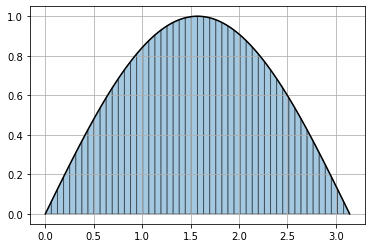

In [17]:
#  Define the bounds of our integral
a = 0
b = 1 * np.pi

#  Plot our function
x = np.linspace(a, b, 100)
plt.plot(x, f(x), 'k')
plt.grid(True)

#  Calculate our trapezoids and add the collection to the plot
p, points = return_trapezoids(f, a, b, N = 50 )
ax = plt.gca()
ax.add_collection(p)

In [22]:
#  For the bounds a = 0 and b = pi, the true area is equal to two.
#  For a = 0 and b = 2pi, the true area is zero

#  Calculate the area of each trapezoid and add them all to get the total estimated area.
area = 0
for item in points:
    A = (item[2][0] - item[0][0]) * (item[1][1] + item[2][1]) /2 
    area = area + A
    
print('Estimated area = ', area)
#print (np.abs(area - A_true))

Estimated area =  1.9993419830762618


The numy command trapz(y, x) will calculate this for us.  It will use the points in the vector x and y to define the trapezoids, so for a specified function like above, it is better to have more points to get a more accurate result.  For example. we look at our sine function below using 10, 20, and 50 points.

In [27]:
x = np.linspace(a, b, 10)
#plt.plot(x, f(x), 'k.')
print('Area estimate with 10 points:  ', np.trapz(f(x), x))

x = np.linspace(a, b, 20)
print('Area estimate with 10 points:  ', np.trapz(f(x), x))

x = np.linspace(a, b, 50)
print('Area estimate with 10 points:  ', np.trapz(f(x), x))

Area estimate with 10 points:   1.9796508112164835
Area estimate with 10 points:   1.9954413183201944
Area estimate with 10 points:   1.9993148493240622
